Lenny Dykstra went on a radio show and said he used to dig up dirt on umpires in order to get a more favorable strike zone. However, he's been known to say some ridiculous things over the years.

The following analysis seeks to validate his claims by modeling his 1993 and 1994 walk rates as a beta distribution based on his career numbers prior to each year. From there, we can simulate a credible range of walk totals we'd have expected for both the 1993 and 1994 seasons.

You can find my blog post about this [here]().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as ss
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_column', 50)

%matplotlib inline

In [2]:
# copy-pasta from https://www.baseball-reference.com/players/d/dykstle01.shtml
career_stats = """Year	Age	Tm	Lg	G	PA	AB	R	H	2B	3B	HR	RBI	SB	CS	BB	SO	BA	OBP	SLG	OPS	OPS+	TB	GDP	HBP	SH	SF	IBB	Pos	Awards
1985	22	NYM	NL	83	273	236	40	60	9	3	1	19	15	2	30	24	.254	.338	.331	.669	89	78	4	1	4	2	0	8	
1986	23	NYM	NL	147	498	431	77	127	27	7	8	45	31	7	58	55	.295	.377	.445	.822	129	192	4	0	7	2	1	*8/7	MVP-19
1987	24	NYM	NL	132	479	431	86	123	37	3	10	43	27	7	40	67	.285	.352	.455	.806	117	196	1	4	4	0	3	*8	
1988	25	NYM	NL	126	466	429	57	116	19	3	8	33	30	8	30	43	.270	.321	.385	.706	107	165	3	3	2	2	2	*8	
1989	26	TOT	NL	146	584	511	66	121	32	4	7	32	30	12	60	53	.237	.318	.356	.674	95	182	7	3	5	5	1	*8	
1990	27	PHI	NL	149	691	590	106	192	35	3	9	60	33	5	89	48	.325	.418	.441	.859	138	260	5	7	2	3	14	*8	AS,MVP-9
1991	28	PHI	NL	63	284	246	48	73	13	5	3	12	24	4	37	20	.297	.391	.427	.818	132	105	1	1	0	0	1	8	
1992	29	PHI	NL	85	392	345	53	104	18	0	6	39	30	5	40	32	.301	.375	.406	.781	122	140	1	3	0	4	4	8	
1993	30	PHI	NL	161	773	637	143	194	44	6	19	66	37	12	129	64	.305	.420	.482	.902	144	307	8	2	0	5	9	*8	MVP-2,SS
1994	31	PHI	NL	84	386	315	68	86	26	5	5	24	15	4	68	44	.273	.404	.435	.839	118	137	3	2	0	1	11	*8	AS
1995	32	PHI	NL	62	292	254	37	67	15	1	2	18	10	5	33	28	.264	.353	.354	.707	89	90	1	3	0	2	2	8/7	AS
1996	33	PHI	NL	40	164	134	21	35	6	3	3	13	3	1	26	25	.261	.387	.418	.804	114	56	1	2	1	1	2	8	"""

In [3]:
df = pd.read_table(StringIO(career_stats))
df

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
0,1985,22,NYM,NL,83,273,236,40,60,9,3,1,19,15,2,30,24,0.254,0.338,0.331,0.669,89,78,4,1,4,2,0,8,NaN
1,1986,23,NYM,NL,147,498,431,77,127,27,7,8,45,31,7,58,55,0.295,0.377,0.445,0.822,129,192,4,0,7,2,1,*8/7,MVP-19
2,1987,24,NYM,NL,132,479,431,86,123,37,3,10,43,27,7,40,67,0.285,0.352,0.455,0.806,117,196,1,4,4,0,3,*8,NaN
3,1988,25,NYM,NL,126,466,429,57,116,19,3,8,33,30,8,30,43,0.270,0.321,0.385,0.706,107,165,3,3,2,2,2,*8,NaN
4,1989,26,TOT,NL,146,584,511,66,121,32,4,7,32,30,12,60,53,0.237,0.318,0.356,0.674,95,182,7,3,5,5,1,*8,NaN
5,1990,27,PHI,NL,149,691,590,106,192,35,3,9,60,33,5,89,48,0.325,0.418,0.441,0.859,138,260,5,7,2,3,14,*8,"AS,MVP-9"
6,1991,28,PHI,NL,63,284,246,48,73,13,5,3,12,24,4,37,20,0.297,0.391,0.427,0.818,132,105,1,1,0,0,1,8,NaN
7,1992,29,PHI,NL,85,392,345,53,104,18,0,6,39,30,5,40,32,0.301,0.375,0.406,0.781,122,140,1,3,0,4,4,8,NaN
8,1993,30,PHI,NL,161,773,637,143,194,44,6,19,66,37,12,129,64,0.305,0.420,0.482,0.902,144,307,8,2,0,5,9,*8,"MVP-2,SS"
9,1994,31,PHI,NL,84,386,315,68,86,26,5,5,24,15,4,68,44,0.273,0.404,0.435,0.839,118,137,3,2,0,1,11,*8,AS


In [4]:
print("Dykstra's Career BB%: Pre-1993")
print('-------------------------------')
print('BB = {}'.format(df[df.Year < 1993].BB.sum()))
print('PA = {}'.format(df[df.Year < 1993].PA.sum()))
print('BB% = {:.1%}'.format(df[df.Year < 1993].BB.sum() / df[df.Year < 1993].PA.sum()))

Dykstra's Career BB%: Pre-1993
-------------------------------
BB = 384
PA = 3667
BB% = 10.5%


## Scipy

### Assume Beta Prior

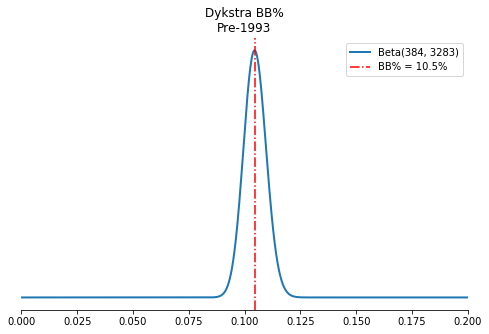

In [5]:
X = np.arange(0, 1., 0.0001)
CAREER_PRIOR = ss.beta(384, 3667-384) # BB, PA-BB

priorBBrate = 384/3667

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X, CAREER_PRIOR.pdf(X), label='Beta(384, 3283)', linewidth=2)
ax.axvline(priorBBrate, linestyle='-.', color='r', label=f'BB% = {priorBBrate:.1%}')
ax.set_xlim(0, .2)
ax.set_yticks([])

plt.legend()
plt.title('Dykstra BB%\nPre-1993')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('./images/dykstra-beta-prior.png', dpi=200)

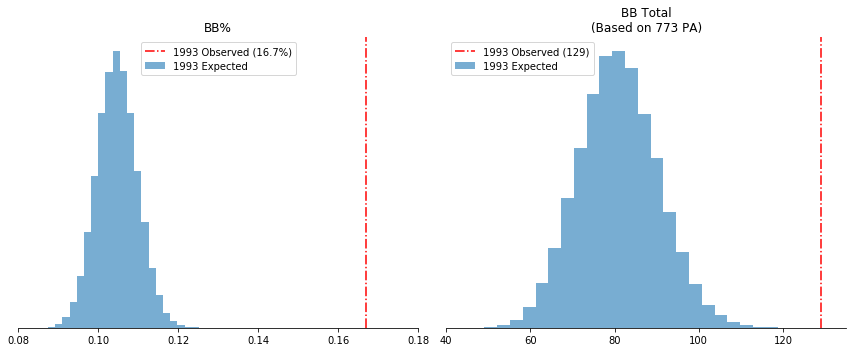

In [6]:
np.random.seed(0)

# prior
careerPriorBB = df[df['Year'] < 1993]['BB'].sum()
careerPriorPA = df[df['Year'] < 1993]['PA'].sum()
CAREER_PRIOR = ss.beta(careerPriorBB, (careerPriorPA - careerPriorBB))


# 1993 numbers
bbCount93 = df[df['Year'] == 1993]['BB'].sum()
paCount93 = df[df['Year'] == 1993]['PA'].sum()
bbRate93 = (bbCount93 / paCount93)


# simulate
bbRateSims93 = CAREER_PRIOR.rvs(100000)
bbCountSims93 = np.random.binomial(paCount93, p=bbRateSims93)


# make some ploty plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# BB%
axes[0].set_title('BB%')
axes[0].hist(bbRateSims93, bins=27, alpha=.6, label='1993 Expected')
axes[0].set_xlim(.08, .18)
axes[0].axvline(bbRate93, label=f'1993 Observed ({bbRate93:.1%})', linestyle='-.', color='r')

# BB Total
axes[1].set_title(f'BB Total\n(Based on {paCount93} PA)')
axes[1].hist(bbCountSims93, bins=27, alpha=.6, label='1993 Expected')
axes[1].axvline(bbCount93, label=f'1993 Observed ({bbCount93})', linestyle='-.', color='r')
axes[1].set_xlim(40, 135)

for ax in axes:
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()

plt.tight_layout()    
plt.savefig('./images/dykstra-walk-sims-93.png', dpi=200)

In [7]:
print(np.percentile(bbRateSims93, q=[2.5, 97.5]))
print(f'Mean BB%: {np.mean(bbRateSims93):.1%} +/- {np.std(bbRateSims93):.1%}')
print(np.percentile(bbCountSims93, q=[2.5, 97.5]))
print(f'Mean BB: {np.mean(bbCountSims93):.0f} +/- {np.std(bbCountSims93):.0f}')

[0.09497479 0.11486074]
Mean BB%: 10.5% +/- 0.5%
[ 63. 100.]
Mean BB: 81 +/- 9


### 1994

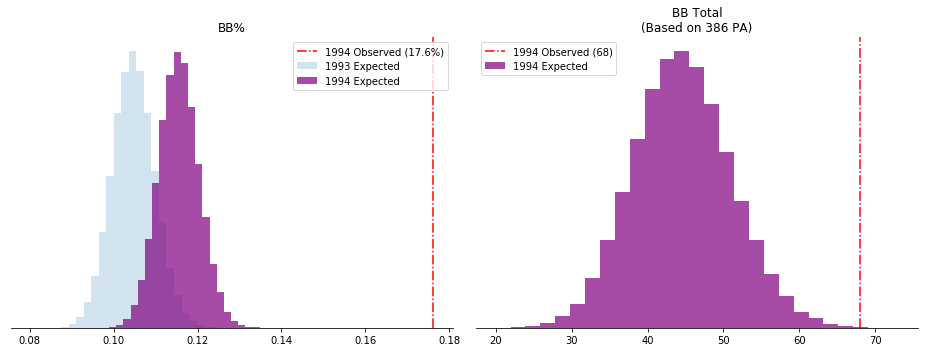

In [8]:
np.random.seed(0)

# prior
careerPriorBB = df[df['Year'] < 1994]['BB'].sum()
careerPriorPA = df[df['Year'] < 1994]['PA'].sum()
CAREER_PRIOR = ss.beta(careerPriorBB, (careerPriorPA - careerPriorBB))


# 1994 numbers
bbCount94 = df[df['Year'] == 1994]['BB'].sum()
paCount94 = df[df['Year'] == 1994]['PA'].sum()
bbRate94 = (bbCount94 / paCount94)


# simulate
bbRateSims94 = CAREER_PRIOR.rvs(100000)
bbCountSims94 = np.random.binomial(paCount94, p=bbRateSims94)


# make some ploty plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# BB%
axes[0].set_title('BB%')
axes[0].hist(bbRateSims93, bins=27, alpha=.2, label='1993 Expected')
axes[0].hist(bbRateSims94, bins=27, alpha=.7, color='purple', label='1994 Expected')
axes[0].axvline(bbRate94, label=f'1994 Observed ({bbRate94:.1%})', linestyle='-.', color='r')

# BB Total
axes[1].set_title(f'BB Total\n(Based on {paCount94} PA)')
axes[1].hist(bbCountSims94, bins=27, color='purple', alpha=.7, label='1994 Expected')
axes[1].axvline(bbCount94, label=f'1994 Observed ({bbCount94})', linestyle='-.', color='r')

for ax in axes:
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()

plt.tight_layout()    
plt.savefig('./images/dykstra-walk-sims-94.png', dpi=200)

In [9]:
pd.Series(bbCountSims94).value_counts().sort_index() / len(bbCountSims94) * 100

20    0.002
21    0.003
22    0.006
23    0.009
24    0.024
25    0.043
26    0.078
27    0.115
28    0.200
29    0.303
30    0.455
31    0.601
32    0.972
33    1.232
34    1.700
35    2.169
36    2.605
37    3.325
38    3.820
39    4.474
40    4.903
41    5.557
42    5.809
43    5.961
44    6.216
45    5.904
46    5.981
47    5.439
48    5.186
49    4.639
50    4.042
51    3.648
52    3.033
53    2.515
54    2.165
55    1.703
56    1.324
57    1.045
58    0.791
59    0.609
60    0.392
61    0.300
62    0.242
63    0.177
64    0.101
65    0.070
66    0.049
67    0.023
68    0.023
69    0.005
70    0.003
71    0.006
72    0.002
73    0.001
dtype: float64

In [10]:
# https://www.baseball-reference.com/pi/shareit/jlkOc
league_stats = """Year	Tms	G	PA	BB	IBB
1996	28	4534	177261	16093	1343
1995	28	4034	156703	14240	1105
1994	28	3200	124483	11131	1008
1993	28	4538	174564	15110	1477
1992	26	4212	160545	13682	1315
1991	26	4208	160746	13984	1228
1990	26	4210	160316	13852	1384
1989	26	4212	160033	13528	1446
1988	26	4200	159380	12984	1367
1987	26	4210	161922	14389	1287
1986	26	4206	160858	14227	1289
1985	26	4206	160320	13838	1337"""


league = pd.read_table(StringIO(league_stats), index_col='Year').sort_index()
league['BB%'] = league['BB'] / league['PA']
league

,Tms,G,PA,BB,IBB,BB%
Year,,,,,,
1985,26,4206,160320,13838,1337,0.086315
1986,26,4206,160858,14227,1289,0.088444
1987,26,4210,161922,14389,1287,0.088864
1988,26,4200,159380,12984,1367,0.081466
1989,26,4212,160033,13528,1446,0.084533
1990,26,4210,160316,13852,1384,0.086404
1991,26,4208,160746,13984,1228,0.086994
1992,26,4212,160545,13682,1315,0.085222
1993,28,4538,174564,15110,1477,0.086559


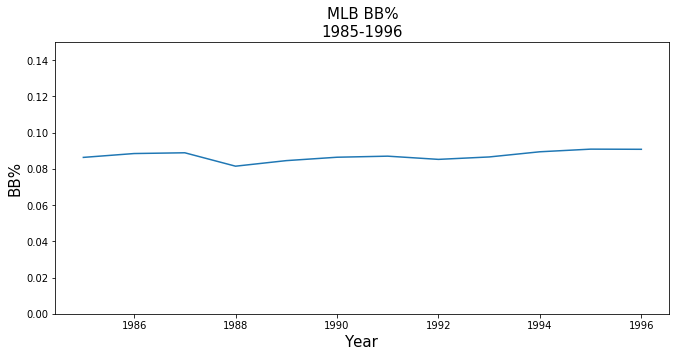

In [11]:
plt.figure(figsize=(11,5))
league['BB%'].plot()
plt.title('MLB BB%\n1985-1996', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('BB%', fontsize=15)
plt.ylim(0, 0.15)
plt.savefig('./images/mlb-bb-rate.png', dpi=200)

## PyMC3

In [12]:
import pymc3 as pm

with pm.Model() as model:
    bb_rate = pm.Beta('BB%', 384, 3667-384)
    bb_count = pm.Binomial('BB', p=bb_rate, n=773)
    
    trace = pm.sample(10000, progressbar=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [BB%_logodds__]
>Metropolis: [BB]
 63%|██████▎   | 6640/10500 [00:05<00:03, 1208.14it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '72233' (I am process '72234')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/gregoryreda/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
 66%|██████▌   | 6925/10500 [00:05<00:02, 1213.98it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '72233' (I am process '72235')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/gregoryreda/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
100%|██████████| 10500/10500 [00:08<00:00, 1258.20it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '72234' (I am process '72235')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/gregoryreda/.theano/compiledir_Darwin-16.7.0-

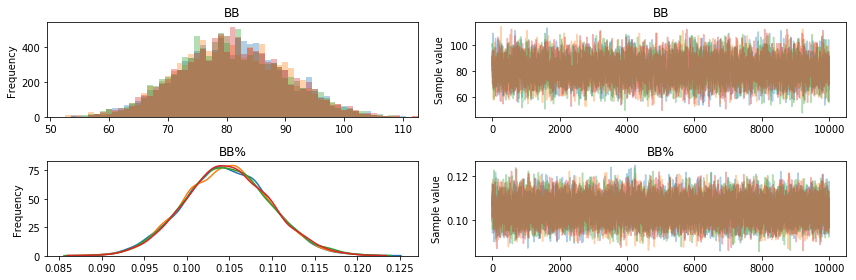

In [13]:
pm.traceplot(trace);

In [14]:
pm.summary(trace).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
BB,80.926,9.306,0.112,62.000,98.000,6660.0,1.0
BB%,0.105,0.005,0.000,0.095,0.115,11113.0,1.0
